### Exploratory Data Analysis on Air Quality Dataset

| Column Name | Data Type | Description | Units |
| -------- | ------- | -------- | ------- |
| Date | Datetime | Date of Monitoring | ------- |
| Time | Datetime | Time of Monitoring| ------- |
| CO(GT) | Integer | True hourly averaged concentration CO in mg/$m^{3}$ (reference analyzer)  |  mg/$m^{3}$|
| PT08.S1(CO) | Categorical | hourly averaged sensor response (nominally CO targeted) | ------- |
| NMHC(GT) | Integer | True hourly averaged overall Non Metanic HydroCarbons concentration in &micro;g/$m^{3}$ (reference analyzer) | &micro;g/$m^{3}$	 |
| C6H6(GT) | Continuous | True hourly averaged Benzene concentration in &micro;g/m^3 (reference analyzer) | ------- |
| PT08.S2(NMHC) | Categorical | hourly averaged sensor response (nominally NMHC targeted) | ------- |
| NOx(GT)   | Integer | True hourly averaged NOx concentration in ppb (reference analyzer) | ppb |
| PT08.S3(NOx)   | Categorical | hourly averaged sensor response (nominally NOx targeted) | ------- |
| NO2(GT)   | Integer | True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) | &micro;g/$m^{3}$ |
| PT08.S4(NO2)   | Categorical | hourly averaged sensor response (nominally NO2 targeted) | ------- |
| PT08.S5(O3)   | Categorical | hourly averaged sensor response (nominally O3 targeted) | ------- |
| T   | Continuous | Temperature | &deg;C |
| RH  | Continuous | Relative Humidity | % |
| AH   | Continuous | Absolute Humidity | ------- |


In [31]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('ggplot')

In [55]:
df = pd.read_csv('data/AirQualityUCI.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [56]:
# Observe null (NaN) values
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [57]:
# Remove those NaN values and Unnecessary columns
df = df.drop(['Unnamed: 15','Unnamed: 16'], axis = 1)
df = df.dropna()
df.shape

(9357, 15)

In [58]:
# To combine Date and Time column and set to index
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' +df['Time'].str.replace('.',':'),format= '%d/%m/%Y %H:%M:%S')
df = df.set_index('Datetime')

# Remove the Date Time since we already have a new index column, Datetime
df = df.drop(['Date','Time'], axis = 1)

# Separate Categorical and Numerical Data Types
feat_df = pd.concat([df.filter(like='GT'),df[['T','RH','AH']]] ,axis=1)
category_df = df.filter(like='(CO)')


In [59]:
feat_df.head() 

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
Datetime,,,,,,,,
2004-03-10 18:00:00,"2,6",150.0,"11,9",166.0,113.0,"13,6","48,9","0,7578"
2004-03-10 19:00:00,2,112.0,"9,4",103.0,92.0,"13,3","47,7","0,7255"
2004-03-10 20:00:00,"2,2",88.0,"9,0",131.0,114.0,"11,9","54,0","0,7502"
2004-03-10 21:00:00,"2,2",80.0,"9,2",172.0,122.0,"11,0","60,0","0,7867"
2004-03-10 22:00:00,"1,6",51.0,"6,5",131.0,116.0,"11,2","59,6","0,7888"


In [60]:
feat_df[['CO(GT)','C6H6(GT)','T','RH','AH']] = feat_df[['CO(GT)','C6H6(GT)','T','RH','AH']].apply\
    (lambda x: x.str.replace(',','.').astype(float))
feat_df.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
Datetime,,,,,,,,
2004-03-10 18:00:00,2.6,150.0,11.9,166.0,113.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,112.0,9.4,103.0,92.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,88.0,9.0,131.0,114.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,80.0,9.2,172.0,122.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,51.0,6.5,131.0,116.0,11.2,59.6,0.7888


<Axes: >

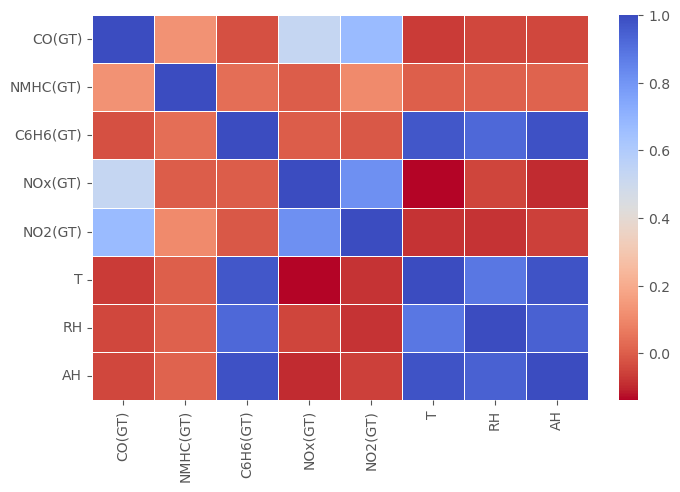

In [61]:
corr_mat = feat_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_mat,cmap="coolwarm_r",fmt=".2f", linewidths=.5)

Since NO2(GT), T, RH, and AH are observed to be highly correlated. We can provide a new feature between some air pollutants. Let's provide NO2/NOx ratio, NMHC/CO ratio. We can remove AH and then form a new variable between Temperature and RH which is *dew point* using the formula:

$T_d = T-\frac{{100 - RH}}{5}$

In [62]:
feat_df_new = feat_df.copy()

# NO2/NOx ratio
feat_df_new['NO2/NOx(GT)'] = feat_df_new['NO2(GT)']/feat_df_new['NOx(GT)']

# NMHC/CO ratio
feat_df_new['NMHC/CO(GT)'] = feat_df_new['NMHC(GT)']/feat_df_new['CO(GT)']

# Dew Point
feat_df_new['Dew_Point'] = abs(feat_df_new['T'] - (100 - feat_df_new['RH']) / 5)

# Remove AH and other columns
feat_df_new = feat_df_new.drop(['AH','NO2(GT)','NOx(GT)','NMHC(GT)','CO(GT)','T','RH'],axis=1)
feat_df_new.head()


,C6H6(GT),NO2/NOx(GT),NMHC/CO(GT),Dew_Point
Datetime,,,,
2004-03-10 18:00:00,11.9,0.680723,57.692308,3.38
2004-03-10 19:00:00,9.4,0.893204,56.000000,2.84
2004-03-10 20:00:00,9.0,0.870229,40.000000,2.70
2004-03-10 21:00:00,9.2,0.709302,36.363636,3.00
2004-03-10 22:00:00,6.5,0.885496,31.875000,3.12


<Axes: >

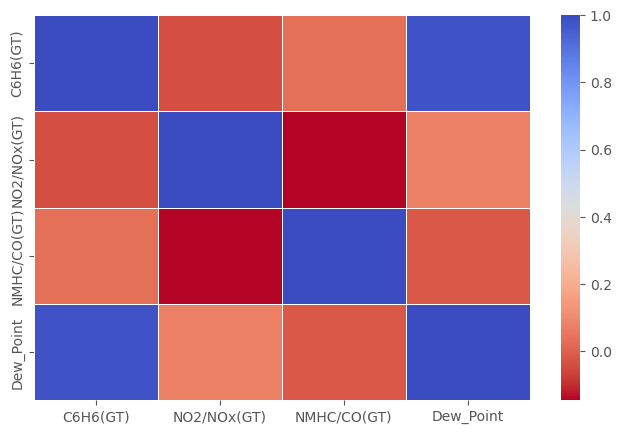

In [63]:
corr_mat = feat_df_new.corr().copy()
plt.figure(figsize=(8,5))
sns.heatmap(corr_mat,cmap="coolwarm_r",fmt=".2f", linewidths=.5)

Based on this observation that Dew_Point is highly correlated with C6H6(GT) and then the two new ratio features which are NO2/NOx(GT) and NMHC/CO(GT) are highly correlated variables. We should not combine any of those correlations in training a model. It would result to multicollinearity issue or overfitting of the model.

In [72]:
feat_df_new = feat_df_new.drop('NMHC/CO(GT)',axis=1).copy()

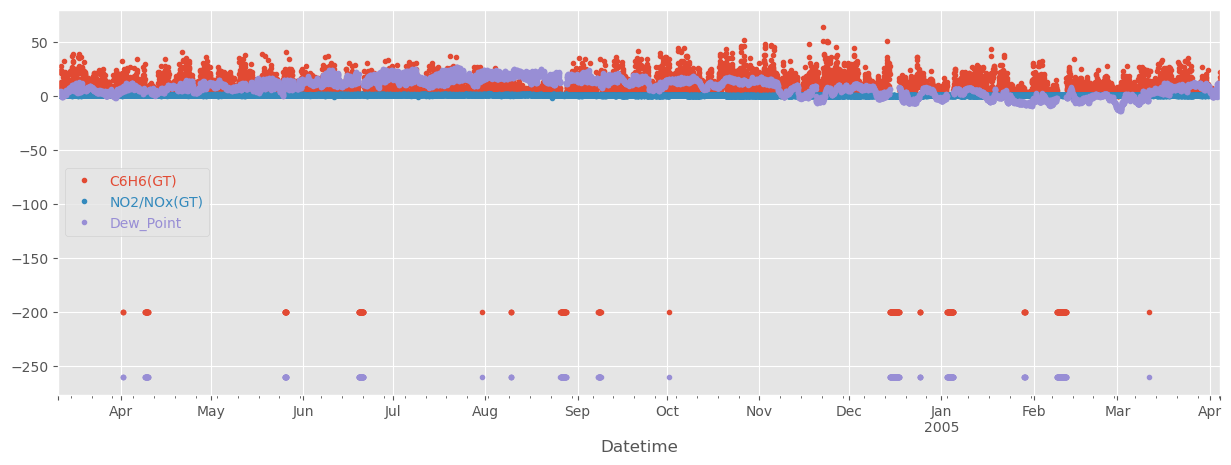

In [83]:
ax = feat_df_new.plot(style='.',figsize=(15,5),color=[color_pal[0],color_pal[1],color_pal[2]])
ax.legend(labelcolor='linecolor',loc='center left')
plt.show()

In [88]:
filter_df = feat_df_new[(feat_df_new['NO2/NOx(GT)'] >= 0) & (feat_df_new['C6H6(GT)'] >= 0) & (feat_df_new['Dew_Point'] >= 0)]
filter_df.shape

(7576, 3)

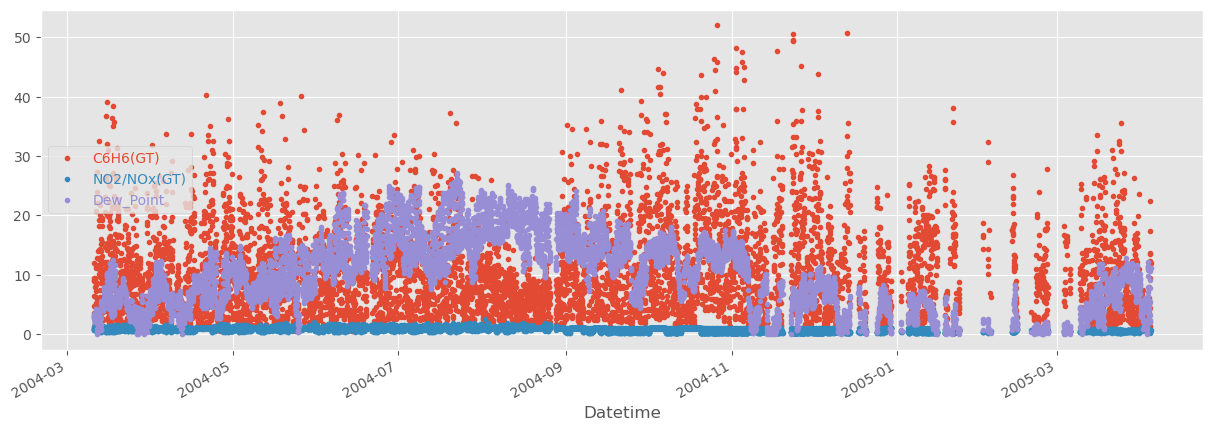

In [89]:
ax = filter_df.plot(style='.',figsize=(15,5),color=[color_pal[0],color_pal[1],color_pal[2]])
ax.legend(labelcolor='linecolor',loc='center left')
plt.show()

In [90]:
filter_df.to_csv('data/clean_data_AirQualityUCI.csv')